# 회귀분석 과제
2022-01-20
- 출처 18기 DS 신혜연님

---

제출 형식: 본인 Github에 다음과 같은 파일명으로 두 개의 파일을 업로드하시면 됩니다.  
- 20기_학과명_이름.ipynb  
- graduate_submission.csv

# 구글 드라이브 mount **(Colab을 사용하는 경우에만 해당)**
Jupyter Notebook을 사용하시는 경우 이 부분은 무시하고 진행하시면 됩니다.

# 목표: 대학원 합격 확률 및 합격 여부 예측

- 회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 통해 학습시켜 봅시다.

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채워 넣어주시면 됩니다.  
"## TODO"라고 적힌 부분에는 코드를 작성하여 주시고, "A."라고 적힌 부분에는 서술 답안을 작성하여 주세요.  
이를 모두 완성한 **(1) ipynb 파일**과 최종 예측을  **(2) csv 파일**로 저장하여 본인 Github에 업로드하시면 됩니다.

In [65]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 확인
graduate_train.csv 파일과 graduate_test.csv 파일을 My Drive에 넣어주세요.  
(Jupyter Notebook을 사용하시는 경우에는 graduate_train.csv 파일과 graduate_test.csv 파일 경로를 각각의 로컬 디렉토리 위치로 변경해주세요.)

In [67]:
# train 데이터 불러오기
train = pd.read_csv('graduate_train.csv')

# train 데이터 크기 확인
print(train.shape)
print('\n')

# train 데이터 훑어보기
train.head()

(400, 8)




,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,No,0.71
1,307,105,2,2.5,4.5,8.12,Yes,0.67
2,329,111,4,4.5,4.0,9.01,Yes,0.81
3,300,105,1,1.0,2.0,7.80,No,0.58
4,329,114,5,4.0,5.0,9.30,Yes,0.86


In [68]:
# test 데이터 불러오기
test = pd.read_csv('graduate_test.csv')

# test 데이터 크기 확인
print(test.shape)
print('\n')

# test 데이터 훑어보기
test.head()

# test 데이터에는 'Chance of Admit'이 없습니다. 이 확률을 예측해보는 것이 과제입니다. 네

(100, 7)




,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,No
1,297,96,2,2.5,1.5,7.89,No
2,302,101,2,2.5,3.5,7.96,No
3,318,112,3,4.0,3.5,8.67,No
4,304,100,4,1.5,2.5,7.84,No


# 1. 결측치

데이터에 결측치가 있는지 확인해보세요.

In [69]:
## TODO
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.1+ KB


In [70]:
train.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,400.00000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,316.31000,107.097500,3.08250,3.348750,3.465000,8.560650,0.717675
std,11.29548,6.022763,1.15283,0.977952,0.909446,0.601597,0.140687
min,290.00000,92.000000,1.00000,1.000000,1.500000,6.800000,0.340000
25%,308.00000,103.000000,2.00000,2.500000,3.000000,8.120000,0.630000
50%,317.00000,107.000000,3.00000,3.500000,3.500000,8.545000,0.720000
75%,324.00000,112.000000,4.00000,4.000000,4.000000,9.025000,0.820000
max,340.00000,120.000000,5.00000,5.000000,5.000000,9.920000,0.970000


Q. 데이터에 결측치가 있나요? 어떤 방법으로 처리하였나요?  
A. 결측치가 없습니다

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해주어야 된다는 점에 유의하세요.**

In [71]:
## TODO
test = pd.get_dummies(data=test, columns=['Research'])
print(test.head())
train = pd.get_dummies(data=train, columns=['Research'])
print(train.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research_No  \
0        304          103                  5  5.0  4.0  8.64            1   
1        297           96                  2  2.5  1.5  7.89            1   
2        302          101                  2  2.5  3.5  7.96            1   
3        318          112                  3  4.0  3.5  8.67            1   
4        304          100                  4  1.5  2.5  7.84            1   

   Research_Yes  
0             0  
1             0  
2             0  
3             0  
4             0  
   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Chance of Admit  \
0        310          105                  2  3.0  3.5  8.01             0.71   
1        307          105                  2  2.5  4.5  8.12             0.67   
2        329          111                  4  4.5  4.0  9.01             0.81   
3        300          105                  1  1.0  2.0  7.80             0.58   
4        329          11

Q. 어떤 변수가 범주형인가요? 어떻게 처리해 주었나요?  
A. research를 one-hot-encoding을 해주었습니다.

# 3. 선형(Linear) 회귀

In [72]:
# 먼저 데이터를 설명변수와 종속변수로 분리합니다.
X = train.drop('Chance of Admit', axis=1)
y = train['Chance of Admit']

In [87]:
# 데이터를 train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [74]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 8)
training response size: (320,)
test predictors size: (80, 8)
test response size: (80,)


### 3.1. scikit-learn으로 선형 회귀

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [76]:
# 1. 먼저 모델을 만들어 줍니다.
## TODO
model1 = LinearRegression()
# 2. 모델을 적합시킵니다.
## TODO
model1.fit(X_train, y_train)
# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
y_predict = model1.predict(X_test)
print(r2_score(y_test, y_predict))

0.7729129788216603


#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
# 4. X_test로 y_pred를 만들어줍니다.
## TODO
y_pred = model1.predict(X_test)
print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))

MSE: 0.0040
Variance score: 0.7729


#### 3.1.2. 모델의 절편 계수를 확인해봅시다.

In [79]:
## TODO
print(model1.intercept_)

-1.241942143701871


Q. 절편 계수의 의미는 무엇인가요?  
A. 독립변수가 0일 때 결과 값이라고 생각하면 되는데 초기값에 큰 영향을 준다.

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [80]:
## TODO
print(model1.coef_)

[ 0.00164004  0.00360629  0.00274832  0.00725297  0.01734313  0.11207947
 -0.01324072  0.01324072]


Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 유의미한 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?  
A. 기울기 계수는 각 변인이 결과에 미치는 영향력으로 가중치라고 생각하면 된다. 절대 값이 클 수록 결과에 유의미한 관계를 갖는다고 할 수 있다.

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 scatter plot으로 그려 보세요.

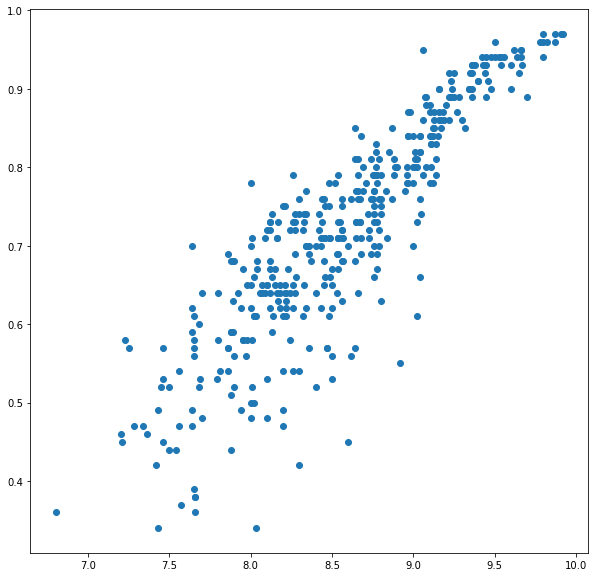

In [81]:
## TODO
plt.figure(figsize=(10,10))
plt.scatter(train['CGPA'], train['Chance of Admit'])
plt.show()

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 box plot으로 그려 보세요.

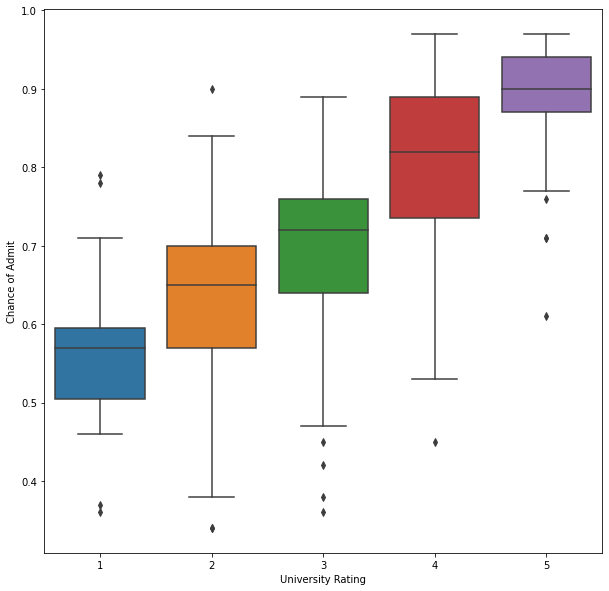

In [82]:
## TODO
import seaborn as sns 

plt.figure(figsize=(10,10))
sns.boxplot(x=train['University Rating'], y=train['Chance of Admit'])
plt.show()

### 3.2. StatsModels로 선형 회귀 시행하기

In [84]:
import statsmodels.api as sm

In [85]:
## TODO
model2 = sm.OLS(y_train, X_train)
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          1.99e-114
Time:                        16:16:14   Log-Likelihood:                 449.18
No. Observations:                 320   AIC:                            -882.4
Df Residuals:                     312   BIC:                            -852.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             0.0016      0.001      2.571      0.011       0.000       0.003
TOEFL Score           0.0036      0.001      3.161      0.002       0.001       0.006
University Rating     0.0027      0.005      0.582      0.561      -0.007       0.012
SOP                   0.0073      0.006      1.273      0.204      -0.004       0.018
LOR                   0.0173      0.005      3.391      0.001       0.007       0.027
CGPA                  0.1121      0.012      9.237      0.000       0.088       0.136
Research_No          -1.2552      0.132     -9.498      0.000      -1.515      -0.995
Research_Yes         -1.2287      0.136     -9.065      0.000      -1.495      -0.962
==============================================================================
Omnibus:                       72.061   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.598
Skew:                          -1.110   Prob(JB):                     2.99e-36
Kurtosis:                       5.710   Cond. No.                     1.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 볼 수 있나요?  
A. 분야에 따라 다르겠지만 일반적으로는 좋은 모델이라고 볼 수 있다.

Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'이 대학원 합격률에 미치는 영향을 어떻게 해석할 수 있을까요?  
A. p value 값이 너무 커서 유의미한 영향을 끼친다고 보기는 어렵다.

# 4. Ridge, Lasso 회귀

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.  
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보세요.**  
(힌트: cross-validation을 사용하세요.)  
(참고자료:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [93]:
from sklearn.linear_model import RidgeCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
R_model = RidgeCV(cv=5)
# 2. 모델을 적합시킵니다.
## TODO
R_model.fit(X_train, y_train)
# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
y_pred = R_model.predict(X_test)
print(r2_score(y_pred, y_test))

0.718112054141768


In [94]:
from sklearn.linear_model import LassoCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
L_model = LassoCV(cv=5)
# 2. 모델을 적합시킵니다.
## TODO
L_model.fit(X_train, y_train)
# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
y_pred = L_model.predict(X_test)
print(r2_score(y_pred, y_test))

0.7113042886092971
